In [7]:
!git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 263 (delta 20), reused 0 (delta 0), pack-reused 214
Receiving objects: 100% (263/263), 13.14 MiB | 19.56 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [4]:
% pip install tiffile
%cd /content/GDAA2030/tutorial2/kqmaynard/

/content/GDAA2030/tutorial2/kqmaynard


                                  productId  ...                                       download_url
0  LC08_L1TP_149039_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
1  LC08_L1TP_012001_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
2  LC08_L1TP_012002_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
3  LC08_L1TP_012010_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
4  LC08_L1TP_012011_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...

[5 rows x 12 columns]
0         2017-04-11 05:36:29.349932
1         2017-04-11 15:14:40.001201
2         2017-04-11 15:15:03.871058
3         2017-04-11 15:18:14.918879
4         2017-04-11 15:18:38.780265
                     ...            
1940860   2020-04-22 06:08:14.274385
1940861   2020-04-22 06:08:38.165424
1940862   2020-04-22 06:09:02.060699
1940863   2020-04-22 06:21:23.483521
1940864

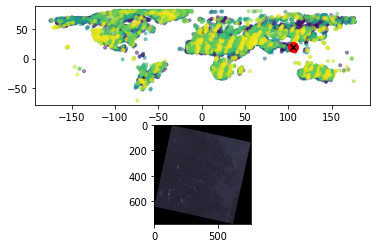

In [8]:
#Name: GDAA2030_T2_KMaynard.py
#Purpose: Specify and call the landsat image of a determined area and display it as a plot

#import the GDAA2030_T2_functions_KMaynard.py to run the functions to isolate the imagery
import GDAA2030_T2_functions_KMaynard as glf

#Set the settings for the satellite imagery 
lat = 20.239570
lon = 105.724550      #location of the endangered primate research centre in Vietnam
band = 4
cloudCoverMax = 2
sceneList = 'https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz'
sceneTest = None        # low number or none is best for testing
imageDir = r'.\images'

#call the function loadSceneList to define the list of scenes based on teh settings set above
sceneDf = glf.loadScenelist(sceneList,sceneTest,cloudCoverMax)

#call function findPathRow to determine the closest path and row to the lat/lon
path,row = glf.findPathRow(sceneDf,lat,lon)
print(path, row)

#call the selectScene function to select the scene from the previous results 
selectedScene = glf.selectScene(sceneDf,path,row)
print(selectedScene)

#define the image url and image path based on the getImageIO function 
imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)

#download the selected image from Amazon cloud
glf.downloadImage(imageUrl, imagePath)

# display the results using the settings set in plotResults function
glf.plotResults(lat,lon, selectedScene, sceneDf, imagePath)
